# <div align="center" Style="color:red"  color="Red"> Heart Stroke Prediction  </div>

# Problem Description

<b><span style='color:red'> As per the World Health Organization (WHO), stroke is the second most common cause of death worldwide, accounting for roughly 11% of all fatalities. Only in the United States, for every 40 seconds, a person is affected with Heart Stroke, and for every 3 min 30 sec a person dies, and 874,613 deaths occurred in the United States in 2019 due to heart-related diseases. If the person is during the initial stage Diagnosed, then he can change his/her lifestyle like food, exercise, etc to avoid severe consequences. This is a significant problem across the globe, based on the information collected, we can estimate the current condition of the person. People who are in the nitty-gritty stage can go through early check-ups to avoid such health conditions. <br>
Based on input characteristics like gender, age, numerous diseases, and smoking status, these details are helpful in categorizing the problem based on their overall information. This will definitely help doctors in examining the basis of stroke.  <br>
 This dataset is used to determine whether a patient is likely to get a stroke or not.
</span><b>

<b><span style='color:blue'> In Simple words we are doing Stroke Prediction chance Yes or No.  </span><b>

<b><span style='color:green'>        Installing Necessary Libraries Required  </span><b>

In [1]:
#pip install pandas
#pip install pandas-profiling
#pip install numpy
#pip install seaborn
#pip install matplotlib
#pip install os-sys
#pip install scikit-learn
#pip install imblearn
#pip install imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import os
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler



In [3]:
#Checking current working directory
os.getcwd()

'C:\\Users\\kiranc\\Downloads'

In [4]:
#Loading the csv input file into a Data Frame
df1 = pd.read_csv('strokepred.csv')

In [5]:
#Shows the Number of Rows and Columns in the given dataset/df.
df1.shape

(15330, 14)

<b> There are 15330 rows:: 14 coloumns <b>

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15330 entries, 0 to 15329
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15330 non-null  int64  
 1   id                 15330 non-null  int64  
 2   gender             15330 non-null  object 
 3   Testcoll_date      15330 non-null  object 
 4   age                15330 non-null  float64
 5   hypertension       15330 non-null  object 
 6   heart_disease      15330 non-null  object 
 7   ever_married       15330 non-null  object 
 8   work_type          15330 non-null  object 
 9   Residence_type     15330 non-null  object 
 10  avg_glucose_level  15330 non-null  float64
 11  bmi                14727 non-null  float64
 12  smoking_status     15330 non-null  object 
 13  stroke             15330 non-null  int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 1.6+ MB


<b> Getting the Profile Report for entire Dataset </b>

In [7]:
# here we getting summary or overview of the data set 
profile = ProfileReport(df1, minimal = True, progress_bar = False)
profile.to_notebook_iframe()

> <b><span style='color:green'>        Data Cleaning - Pre Processing Steps  </span><b> 

<b> Step1: Removing Junk Columns </b>

In [8]:
#gettig head of the data frame to check the column headers
df1.head()

,Unnamed: 0,id,gender,Testcoll_date,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1815,58587,Male,2017-09-28,61.0,No,No,Yes,Private,Urban,61.32,23.7,smokes,0
1,4775,50763,Male,2017-05-07,42.0,No,No,Yes,Govt_job,Urban,58.35,24.3,never smoked,0
2,1387,2092,Female,2017-11-13,37.0,No,No,Yes,Private,Rural,98.12,27.5,never smoked,0
3,4345,27789,Female,2017-04-22,57.0,No,No,Yes,Private,Urban,73.00,26.2,never smoked,0
4,3860,57924,Female,2017-04-16,45.0,No,No,Yes,Govt_job,Rural,63.01,31.5,never smoked,0


In [9]:
#removing the column unwanted 
df1.drop(['Unnamed: 0'],axis=1,inplace=True)

In [10]:
##gettig head of the data frame to check the column header 
df1.head()

,id,gender,Testcoll_date,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,58587,Male,2017-09-28,61.0,No,No,Yes,Private,Urban,61.32,23.7,smokes,0
1,50763,Male,2017-05-07,42.0,No,No,Yes,Govt_job,Urban,58.35,24.3,never smoked,0
2,2092,Female,2017-11-13,37.0,No,No,Yes,Private,Rural,98.12,27.5,never smoked,0
3,27789,Female,2017-04-22,57.0,No,No,Yes,Private,Urban,73.00,26.2,never smoked,0
4,57924,Female,2017-04-16,45.0,No,No,Yes,Govt_job,Rural,63.01,31.5,never smoked,0


<b> Step2: Removing Duplicated values in the rows </b>

In [11]:
#here we are dropping the duplicates rows
df1 = df1.drop_duplicates()

In [12]:
#Sorting the data based on column id 
df1 = df1.sort_values(by="id")

<div> Ther are 15330 rows before removing the duplicare rows. Now there are 5110 rows

In [13]:
#list the no of rows and columns
df1.shape

(5110, 13)

In [14]:
df1.head()

,id,gender,Testcoll_date,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9181,67,Female,2017-10-19,17.0,No,No,No,Private,Urban,92.97,NaN,formerly smoked,0
146,77,Female,2017-09-24,13.0,No,No,No,children,Rural,85.81,18.6,Unknown,0
3415,84,Male,2017-04-17,55.0,No,No,Yes,Private,Urban,89.17,31.5,never smoked,0
8447,91,Female,2017-11-18,42.0,No,No,No,Private,Urban,98.53,18.5,never smoked,0
6578,99,Female,2017-06-07,31.0,No,No,No,Private,Urban,108.89,52.3,Unknown,0


In [15]:
#here we adding a new column index
df1 = df1.reset_index()

In [16]:
df1.head()

,index,id,gender,Testcoll_date,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9181,67,Female,2017-10-19,17.0,No,No,No,Private,Urban,92.97,NaN,formerly smoked,0
1,146,77,Female,2017-09-24,13.0,No,No,No,children,Rural,85.81,18.6,Unknown,0
2,3415,84,Male,2017-04-17,55.0,No,No,Yes,Private,Urban,89.17,31.5,never smoked,0
3,8447,91,Female,2017-11-18,42.0,No,No,No,Private,Urban,98.53,18.5,never smoked,0
4,6578,99,Female,2017-06-07,31.0,No,No,No,Private,Urban,108.89,52.3,Unknown,0


<b> Step3: Removing  Unique Columns which has no Relation to Target </b>

In [17]:
#removing the column index which is not relevant to predict the stroke 
df1.drop(['index'],axis=1,inplace=True)


In [18]:
df1.head()

,id,gender,Testcoll_date,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67,Female,2017-10-19,17.0,No,No,No,Private,Urban,92.97,NaN,formerly smoked,0
1,77,Female,2017-09-24,13.0,No,No,No,children,Rural,85.81,18.6,Unknown,0
2,84,Male,2017-04-17,55.0,No,No,Yes,Private,Urban,89.17,31.5,never smoked,0
3,91,Female,2017-11-18,42.0,No,No,No,Private,Urban,98.53,18.5,never smoked,0
4,99,Female,2017-06-07,31.0,No,No,No,Private,Urban,108.89,52.3,Unknown,0


In [19]:
#checking no of rows and columns after removign index column 
df1.shape

(5110, 13)

In [20]:
#removing id of record and Testcoll-date columns as there are not required to predict the stroke 
df1.drop(['id'],axis=1,inplace=True)
df1.drop(["Testcoll_date"],axis=1,inplace=True)

In [21]:
#getting the header of data frame
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,17.0,No,No,No,Private,Urban,92.97,NaN,formerly smoked,0
1,Female,13.0,No,No,No,children,Rural,85.81,18.6,Unknown,0
2,Male,55.0,No,No,Yes,Private,Urban,89.17,31.5,never smoked,0
3,Female,42.0,No,No,No,Private,Urban,98.53,18.5,never smoked,0
4,Female,31.0,No,No,No,Private,Urban,108.89,52.3,Unknown,0


In [22]:
#checking total no of rows and columns after removing id and Testcoll_date columns 
df1.shape

(5110, 11)

<b> Step4: BINARY ENCODING for featured one's </b>

In [23]:
#here we are converting the data of columns as binrary values(0,1) , it is easy for model to use numerical data or binary data to train and predict
#it is easy fit in the models
df1['ever_married'] = df1['ever_married'].replace({'No': 0, 'Yes':1})
    
df1['Residence_type'] = df1['Residence_type'].replace({'Rural': 0, 'Urban':1})

df1['hypertension'] = df1['hypertension'].replace({'No': 0, 'Yes':1})
    
df1['heart_disease'] = df1['heart_disease'].replace({'No': 0, 'Yes':1})

df1['gender'] = df1['gender'].replace({'Male': 0, 'Female':1, 'Other':2})

In [24]:
#getting head to see how the data is changed after encoding ever_married,residence_type, hypertension,heart_disease and geneder columns 
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,17.0,0,0,0,Private,1,92.97,NaN,formerly smoked,0
1,1,13.0,0,0,0,children,0,85.81,18.6,Unknown,0
2,0,55.0,0,0,1,Private,1,89.17,31.5,never smoked,0
3,1,42.0,0,0,0,Private,1,98.53,18.5,never smoked,0
4,1,31.0,0,0,0,Private,1,108.89,52.3,Unknown,0


<b> Step5: One Hot Encoding </b>

In [25]:
#here we are hot encoding the work_type and smoking_status. it created new columns for every possbile category present in column
#and assign 0 and 1 based on its presence for example if person do gov job the value is 1 and if not 0 is assigned 
for column in ['work_type','smoking_status']:
    dummies = pd.get_dummies(df1[column],prefix=column)
    df1 = pd.concat([df1, dummies], axis =1)
    df1 = df1.drop(column, axis =1)

In [26]:
#checking how the encoding divided work_type and smoking_status columns
df1.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,17.0,0,0,0,1,92.97,NaN,0,0,0,1,0,0,0,1,0,0
1,1,13.0,0,0,0,0,85.81,18.6,0,0,0,0,0,1,1,0,0,0
2,0,55.0,0,0,1,1,89.17,31.5,0,0,0,1,0,0,0,0,1,0
3,1,42.0,0,0,0,1,98.53,18.5,0,0,0,1,0,0,0,0,1,0
4,1,31.0,0,0,0,1,108.89,52.3,0,0,0,1,0,0,1,0,0,0


<b> Step6: checking for any missing Values and fill with Mode imputation </b>

In [27]:
#Checking no of null values present in each row
df1.isnull().sum()

gender                              0
age                                 0
hypertension                        0
heart_disease                       0
ever_married                        0
Residence_type                      0
avg_glucose_level                   0
bmi                               201
stroke                              0
work_type_Govt_job                  0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
smoking_status_Unknown              0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64

In [28]:
#getting the mode of bmi as it has 201 null values
df1['bmi'].mode()[0]

28.7

In [29]:
#filling null values of bmi with its mode value
df1['bmi'] =df1['bmi'].fillna(df1['bmi'].mode()[0])

In [30]:
#checking null values after adding mode to missing values of bmi and we can see there are no values in any column
df1.isnull().sum()

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
stroke                            0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

<b> Step7: Adding New features and categorizing Age</b>

In [31]:
#this function helps to idenfy the category of person when age is given ,here we are dividing person into 7 categories 
def age_category(val):
    if val >= 0 and val < 2.5:
        return "infant"
    elif val >= 2.5 and val < 4.0:
        return "toddler"
    elif val >=4.0 and val < 12.0:
        return "child"
    elif val >=12.0 and val <19.0:
        return "Teen"
    elif val >=19.0 and val <30.0:
        return "Youth"
    elif val >=30.0 and val <50.0:
        return "Middle Age"
    elif val >=50.0 and val <99.0:
        return "Old Age"
    
        

In [32]:
#calling age_category by passing age of the person and assigning the category to each person 
df1['age_category'] = df1['age']
df1['age_category'] = df1['age_category'].apply(age_category)

In [33]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_category
0,1,17.0,0,0,0,1,92.97,28.7,0,0,0,1,0,0,0,1,0,0,Teen
1,1,13.0,0,0,0,0,85.81,18.6,0,0,0,0,0,1,1,0,0,0,Teen
2,0,55.0,0,0,1,1,89.17,31.5,0,0,0,1,0,0,0,0,1,0,Old Age
3,1,42.0,0,0,0,1,98.53,18.5,0,0,0,1,0,0,0,0,1,0,Middle Age
4,1,31.0,0,0,0,1,108.89,52.3,0,0,0,1,0,0,1,0,0,0,Middle Age


<b> Step8: Detection of Outlier and Removal</b>

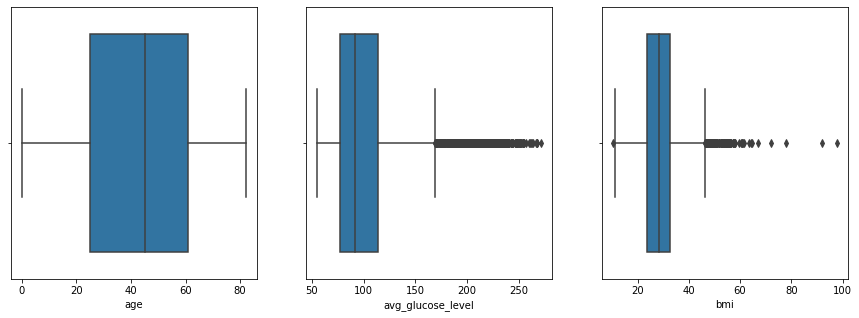

In [34]:
#we are plotting boxplot for age , avg_glucose_level and bmi and finding the outlier in these columns 
plt.figure(figsize =(15,5))
j=1
for i in ['age', 'avg_glucose_level', 'bmi']: 
    plt.subplot(1,3,j)
    sns.boxplot(data = df1 ,x=i)
    j=j+1

In [35]:
#In this function we are printing the outliers informatiom 
num_list = ['age', 'avg_glucose_level', 'bmi']
def outlier_count(col, data=df1):
    print("For "+col)
    
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Outlier Count: {}'.format(outlier_count))
    print('Outlier percentage of data: {}%'.format(outlier_percent))
    print("-"*30)
for col in num_list:
    outlier_count(col)

For age
Outlier Count: 0
Outlier percentage of data: 0.0%
------------------------------
For avg_glucose_level
Outlier Count: 627
Outlier percentage of data: 12.27%
------------------------------
For bmi
Outlier Count: 126
Outlier percentage of data: 2.47%
------------------------------


In [36]:
#removing outliers using interquartile range
features_with_outliers = ['avg_glucose_level','bmi']
for feature in features_with_outliers:
    q1 = df1[feature].quantile(0.25)#the median of the lower half 
    q3 = df1[feature].quantile(0.75)#the median of the upper half 
    IQR = q3-q1#interquartile range
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df1.loc[df1[feature]<lower_limit,feature] = lower_limit
    df1.loc[df1[feature]>upper_limit,feature] = upper_limit

In [37]:
#checking if any outliers are present after removing them 
for col in features_with_outliers:
    outlier_count(col)

For avg_glucose_level
Outlier Count: 0
Outlier percentage of data: 0.0%
------------------------------
For bmi
Outlier Count: 0
Outlier percentage of data: 0.0%
------------------------------


In [38]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_category
0,1,17.0,0,0,0,1,92.97,28.7,0,0,0,1,0,0,0,1,0,0,Teen
1,1,13.0,0,0,0,0,85.81,18.6,0,0,0,0,0,1,1,0,0,0,Teen
2,0,55.0,0,0,1,1,89.17,31.5,0,0,0,1,0,0,0,0,1,0,Old Age
3,1,42.0,0,0,0,1,98.53,18.5,0,0,0,1,0,0,0,0,1,0,Middle Age
4,1,31.0,0,0,0,1,108.89,46.3,0,0,0,1,0,0,1,0,0,0,Middle Age


In [39]:
df1.shape

(5110, 19)

<b> Step9: Renaming Column Names for easy understanding</b>

In [40]:
#renaming the ever_married column to marrital_status for easy understanding
df1 = df1.rename({'ever_married': 'marrital_status'}, axis=1)  

In [41]:
#getting the head to check if column name is changed
df1.head()

,gender,age,hypertension,heart_disease,marrital_status,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_category
0,1,17.0,0,0,0,1,92.97,28.7,0,0,0,1,0,0,0,1,0,0,Teen
1,1,13.0,0,0,0,0,85.81,18.6,0,0,0,0,0,1,1,0,0,0,Teen
2,0,55.0,0,0,1,1,89.17,31.5,0,0,0,1,0,0,0,0,1,0,Old Age
3,1,42.0,0,0,0,1,98.53,18.5,0,0,0,1,0,0,0,0,1,0,Middle Age
4,1,31.0,0,0,0,1,108.89,46.3,0,0,0,1,0,0,1,0,0,0,Middle Age


<b> step10 : Splitting Data into 80% Training ang 20% Testing </b>

In [42]:
# As we need  data to train as well as test, we are dividing 80% data to train and 20% data to test
train_data = df1.sample(frac=0.8,random_state=50)
test_data = df1.drop(train_data.index)
train_data.describe()

,gender,age,hypertension,heart_disease,marrital_status,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000
mean,0.582926,43.252368,0.098826,0.055039,0.656800,0.513699,101.465358,28.669936,0.045988,0.130871,0.005137,0.569716,0.159736,0.134540,0.303816,0.173190,0.371575,0.151419
std,0.493632,22.679979,0.298465,0.228085,0.474836,0.499873,33.553038,7.109454,0.209485,0.337300,0.071497,0.495176,0.366406,0.341273,0.459960,0.378458,0.483285,0.358500
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.220000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,77.287500,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,45.000000,0.000000,0.000000,1.000000,1.000000,92.230000,28.400000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,1.000000,115.040000,32.725000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,1.000000,169.357500,46.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<b> we have 4088 rows to train and 1022 rows to test the model

In [43]:
#showing test data
test_data.describe()


,gender,age,hypertension,heart_disease,marrital_status,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,0.599804,43.123601,0.091977,0.049902,0.653620,0.485323,99.119587,28.890313,0.059687,0.119374,0.000978,0.583170,0.162427,0.134051,0.295499,0.173190,0.364971,0.166341
std,0.490178,22.351996,0.289134,0.217849,0.476049,0.500029,31.772256,7.162096,0.237022,0.324387,0.031281,0.493276,0.369022,0.340874,0.456490,0.378597,0.481658,0.372568
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,14.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,76.830000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,45.000000,0.000000,0.000000,1.000000,0.000000,90.660000,28.400000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,59.000000,0.000000,0.000000,1.000000,1.000000,111.005000,33.075000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,169.357500,46.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# <div  Style="color:red"  color="Red"> 11th way of cleaning is done  at  11.feature selection in EDA  section ,smote Technique to resample the data  </div>

# Exploratory Data Analysis

<b> 1.Getting the Profile Report for entire Dataset </b>

In [44]:
#Again we are profiling the data set after doing pre-processing and cleaning
profile = ProfileReport(df1, minimal = True, progress_bar = False)
profile.to_notebook_iframe()

<b> 2. Histogram for Stroke Column </b>

Text(0.5, 0, 'Stroke')

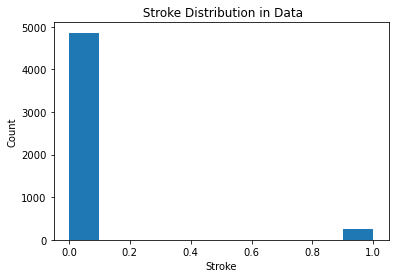

In [45]:
#Plotting Histogram to check no of people got stroke vs no Stroke
plt.hist(df1['stroke'])
plt.title(" Stroke Distribution in Data")
plt.ylabel("Count")
plt.xlabel("Stroke")

> <b><span style='color:green'>        From this histogream we can understand we have 95% data with no stroke and 5% with stroke  </span><b>

Text(0.5, 0, 'bmi')

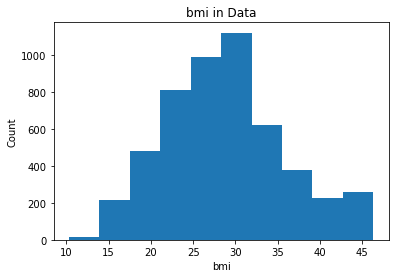

In [46]:
#Plotting Histogram to check distribution of BMI 
plt.hist(df1['bmi'])
plt.title("bmi in Data")
plt.ylabel("Count")
plt.xlabel("bmi")

<b> 3. Heat Map for Cleaned Data <b>

<AxesSubplot:>

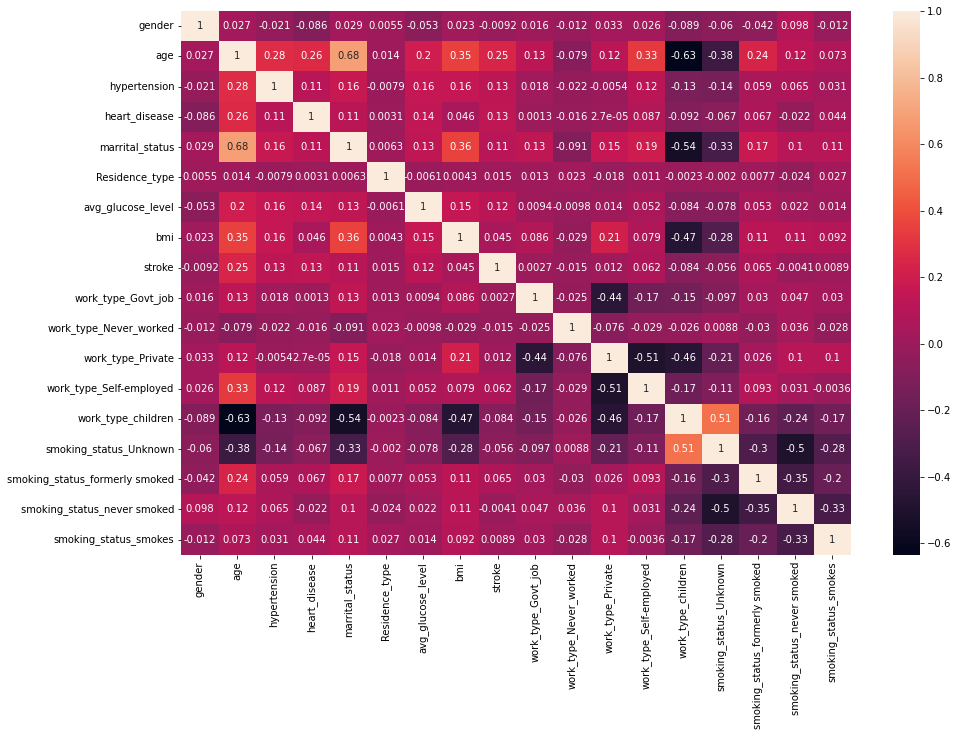

In [47]:
#plotting the correlation matrix/heat map
plt.figure(figsize = (15,10))
sns.heatmap(df1.corr(),annot = True) 

In [48]:
#correlation between columns 
df1.corr()

,gender,age,hypertension,heart_disease,marrital_status,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
gender,1.000000,0.027300,-0.021390,-0.085749,0.029366,0.005529,-0.053307,0.023229,-0.009200,0.016369,-0.011513,0.032959,0.025778,-0.089374,-0.059875,-0.041839,0.098436,-0.011638
age,0.027300,1.000000,0.276398,0.263796,0.679125,0.014180,0.199720,0.352439,0.245257,0.130013,-0.078653,0.116534,0.327989,-0.634215,-0.378231,0.236897,0.119307,0.073133
hypertension,-0.021390,0.276398,1.000000,0.108306,0.164243,-0.007913,0.156811,0.156066,0.127904,0.017685,-0.021608,-0.005413,0.115442,-0.129506,-0.141501,0.058853,0.065063,0.031240
heart_disease,-0.085749,0.263796,0.108306,1.000000,0.114644,0.003092,0.139785,0.046276,0.134914,0.001330,-0.015712,0.000027,0.086760,-0.091634,-0.066731,0.066804,-0.021856,0.044049
marrital_status,0.029366,0.679125,0.164243,0.114644,1.000000,0.006261,0.133309,0.357424,0.108340,0.134041,-0.090838,0.153830,0.192716,-0.544441,-0.332081,0.171256,0.102845,0.105226
Residence_type,0.005529,0.014180,-0.007913,0.003092,0.006261,1.000000,-0.006061,0.004334,0.015458,0.013131,0.022859,-0.018173,0.010594,-0.002309,-0.002036,0.007654,-0.024466,0.027266
avg_glucose_level,-0.053307,0.199720,0.156811,0.139785,0.133309,-0.006061,1.000000,0.152855,0.115652,0.009440,-0.009808,0.014101,0.052458,-0.084246,-0.077777,0.053182,0.021979,0.013773
bmi,0.023229,0.352439,0.156066,0.046276,0.357424,0.004334,0.152855,1.000000,0.045020,0.085530,-0.029266,0.210994,0.078872,-0.469130,-0.284159,0.114868,0.111240,0.092160
stroke,-0.009200,0.245257,0.127904,0.134914,0.108340,0.015458,0.115652,0.045020,1.000000,0.002677,-0.014882,0.011888,0.062168,-0.083869,-0.055892,0.064556,-0.004129,0.008939
work_type_Govt_job,0.016369,0.130013,0.017685,0.001330,0.134041,0.013131,0.009440,0.085530,0.002677,1.000000,-0.025258,-0.444420,-0.167810,-0.151383,-0.097418,0.029686,0.046908,0.030026


In [49]:
df1.corr()['stroke'].sort_values(ascending=False)[1:]

age                               0.245257
heart_disease                     0.134914
hypertension                      0.127904
avg_glucose_level                 0.115652
marrital_status                   0.108340
smoking_status_formerly smoked    0.064556
work_type_Self-employed           0.062168
bmi                               0.045020
Residence_type                    0.015458
work_type_Private                 0.011888
smoking_status_smokes             0.008939
work_type_Govt_job                0.002677
smoking_status_never smoked      -0.004129
gender                           -0.009200
work_type_Never_worked           -0.014882
smoking_status_Unknown           -0.055892
work_type_children               -0.083869
Name: stroke, dtype: float64

<b>   4. Displot   <b>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

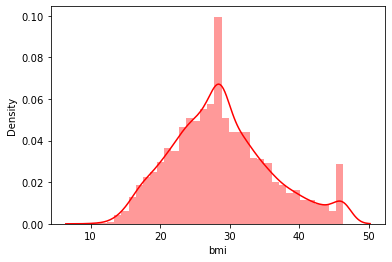

In [50]:
#plotting displot to see distribution of bmi 
sns.distplot(df1.bmi, color="red")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

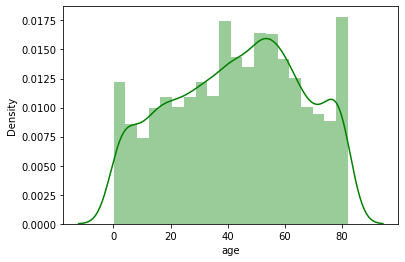

In [51]:
# To find out how the age distribution in our dataset is present.
sns.distplot(df1.age, color = "green")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

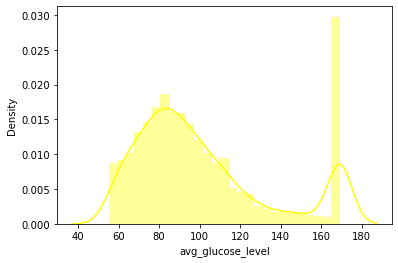

In [52]:
## To find out how the glucose_level distribution in our dataset is present.
sns.distplot(df1.avg_glucose_level, color = "yellow")

<b> 5.Pie Chart <b>

([<matplotlib.patches.Wedge at 0x2965c6059d0>,
 [Text(-0.2932923170393164, 1.0601790493901062, '1'),
  Text(0.3192440878104747, -1.1567554678487835, '0'),
  Text(1.099999792043413, -0.0006763907511957427, '2')],
 [Text(-0.15997762747599073, 0.5782794814855124, '58.59'),
  Text(0.18622571788944353, -0.6747740229117903, '41.39'),
  Text(0.5999998865691343, -0.00036894040974313233, '0.02')])

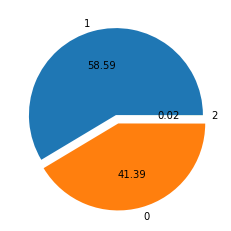

In [53]:
#ploting a piechart to understand the gender segregration in our Data
plt.pie(df1['gender'].value_counts(), labels = df1['gender'].value_counts().index,autopct ='%.2f',explode =[0,0.1,0])

([<matplotlib.patches.Wedge at 0x2965c5a7a30>,
 [Text(-1.0488454518125865, 0.3315467059285184, '0'),
  Text(1.0488454440521755, -0.3315467304785183, '1')],
 [Text(-0.5720975191705017, 0.18084365777919187, '90.25'),
  Text(0.5720975149375501, -0.1808436711701009, '9.75')])

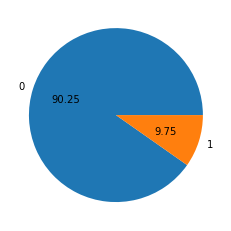

In [54]:
#ploting a piechart to understand the hypertension in our Data
plt.pie(df1['hypertension'].value_counts(), labels = df1['hypertension'].value_counts().index,autopct ='%.2f')

<b> 6.Bar Plot <b>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_category', ylabel='stroke'>

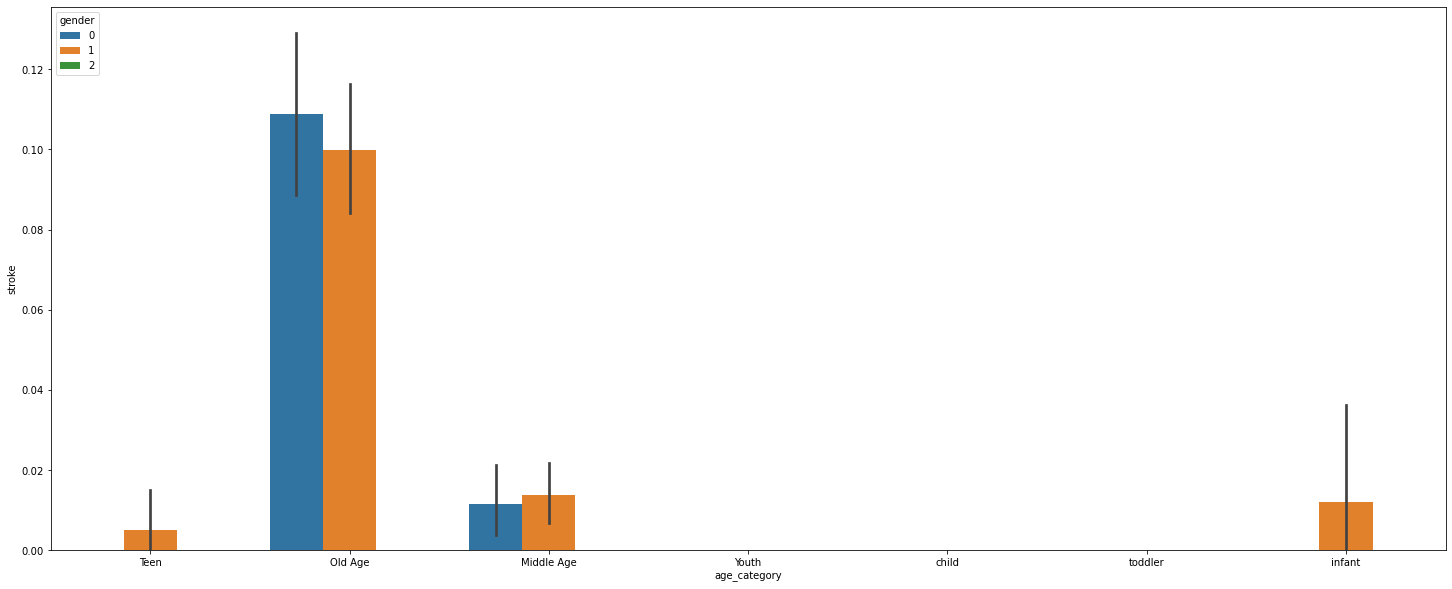

In [55]:
#Here we plotted a bar plot to use relation between age and storke. This tells us the stroke is likely to occured to old age 
# and less in child and toddler 
plt.figure(figsize = (25,10))
sns.barplot('age_category','stroke',hue='gender',data=df1)

<b> 7.Violin Plot<b>

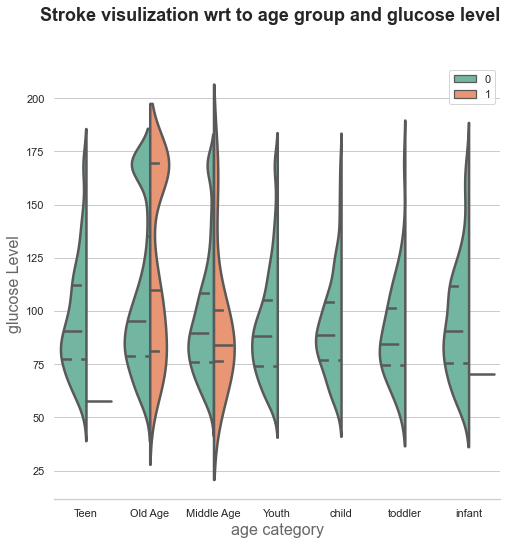

In [56]:
#Here we are using violin plot between age , glucose_level and stroke to see the probability density 

sns.set(style="whitegrid",palette = "Set2", color_codes=True)

f, ax = plt.subplots(figsize=(8, 8))

sns.violinplot(x="age_category", y="avg_glucose_level", hue="stroke", data=df1, split=True, linewidth=2.5,
               inner="quart")
sns.despine(left=True)

f.suptitle('Stroke visulization wrt to age group and glucose level', fontsize=18, fontweight='bold')
ax.set_xlabel("age category",size = 16,alpha=0.7)
ax.set_ylabel("glucose Level ",size = 16,alpha=0.7)
plt.legend(loc='upper right')

<b> 8. Scatterplot<b>

<AxesSubplot:xlabel='avg_glucose_level', ylabel='age'>

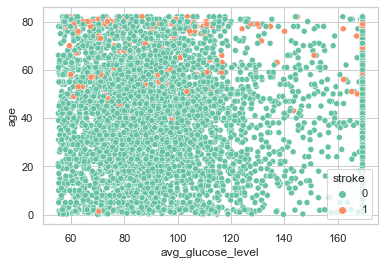

In [57]:
#we are doing a scatterplot between age , glucose level and stroke . to check the stroke occurance 
sns.scatterplot(data = df1, x ='avg_glucose_level', y = 'age', hue = 'stroke')

> <b><span style='color:green'>        From this figure we can understand that Stroke chance are very less populated   </span><b>

<b> 9.Count Plot </b> 


<AxesSubplot:ylabel='stroke'>

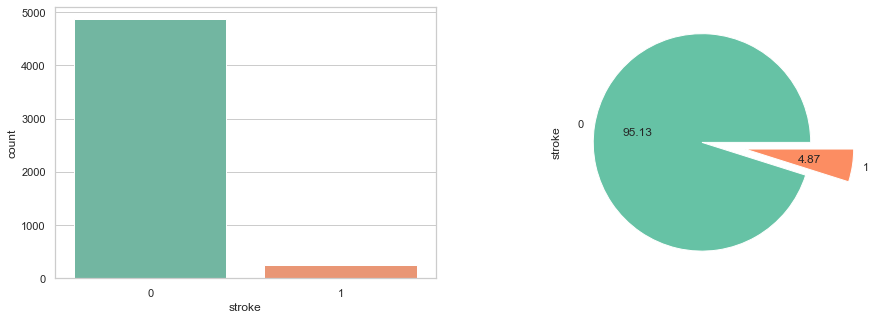

In [58]:
#here are checking the count of rows with stroke and rows with no stroke .from below we an say 95% is without stroke and only 5% is stroke
plt.figure(figsize = (15,5))
plt.subplot(121)
sns.countplot(data = df1, x ='stroke')
plt.subplot(122)
df1['stroke'].value_counts().plot(kind = 'pie', autopct ='%.2f',explode =[0,0.4])

<b>10. Getting Description about Columns <b>

In [59]:
#here we getting informatiom about columns
df1.describe()


,gender,age,hypertension,heart_disease,marrital_status,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.586301,43.226614,0.097456,0.054012,0.656164,0.508023,100.996204,28.714012,0.048728,0.128571,0.004305,0.572407,0.160274,0.134442,0.302153,0.173190,0.370254,0.154403
std,0.492941,22.612647,0.296607,0.226063,0.475034,0.499985,33.214738,7.119856,0.215320,0.334758,0.065480,0.494778,0.366896,0.341160,0.459236,0.378448,0.482920,0.361370
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,45.000000,0.000000,0.000000,1.000000,1.000000,91.885000,28.400000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,1.000000,114.090000,32.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,1.000000,169.357500,46.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<b> 11.Feature selection </b>

In [60]:
#here we are getting correlation w.r.t Stroke column in descending order
corr_mat = df1.corr()["stroke"].sort_values(ascending=False)
corr_mat.head(5)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
hypertension         0.127904
avg_glucose_level    0.115652
Name: stroke, dtype: float64

In [61]:
#here we are getting correlation w.r.t Stroke column in ascending order
corr_mat = df1.corr()["stroke"].sort_values(ascending=True)
corr_mat.head(5)

work_type_children            -0.083869
smoking_status_Unknown        -0.055892
work_type_Never_worked        -0.014882
gender                        -0.009200
smoking_status_never smoked   -0.004129
Name: stroke, dtype: float64

In [62]:
#here we are seeing the most the data is where stroke = 0 or no stroke
features = ["age","heart_disease","avg_glucose_level","hypertension","work_type_children","gender","stroke"]
pre_scaled_data =df1[features]
pre_scaled_data.head(10)

,age,heart_disease,avg_glucose_level,hypertension,work_type_children,gender,stroke
0,17.0,0,92.97,0,0,1,0
1,13.0,0,85.81,0,1,1,0
2,55.0,0,89.17,0,0,0,0
3,42.0,0,98.53,0,0,1,0
4,31.0,0,108.89,0,0,1,0
5,38.0,0,91.44,0,0,1,0
6,24.0,0,97.55,0,0,1,0
7,80.0,0,84.86,0,0,1,0
8,33.0,0,86.97,0,0,1,0
9,20.0,0,94.67,0,0,1,0


<b> Using Smote Technique to resample the data <b>

In [63]:
#we are resampling the data to add more rows which contains stroke = 1 . This is preprocessing and cleaning step 
smote = SMOTE(random_state = 101)
Smote_X , Smote_Y = smote.fit_resample(pre_scaled_data[["age","heart_disease","avg_glucose_level","hypertension","work_type_children","gender"]], pre_scaled_data['stroke'])

In [64]:
Smote_X

,age,heart_disease,avg_glucose_level,hypertension,work_type_children,gender
0,17.000000,0,92.970000,0,0,1
1,13.000000,0,85.810000,0,1,1
2,55.000000,0,89.170000,0,0,0
3,42.000000,0,98.530000,0,0,1
4,31.000000,0,108.890000,0,0,1
...,...,...,...,...,...,...
9717,68.681732,0,81.221845,0,0,0
9718,81.548924,0,86.965825,0,0,0
9719,81.097689,1,104.690589,0,0,0
9720,79.000000,1,129.154725,0,0,0


In [65]:
gk = pd.DataFrame(Smote_Y)

In [66]:
Smote_X

,age,heart_disease,avg_glucose_level,hypertension,work_type_children,gender
0,17.000000,0,92.970000,0,0,1
1,13.000000,0,85.810000,0,1,1
2,55.000000,0,89.170000,0,0,0
3,42.000000,0,98.530000,0,0,1
4,31.000000,0,108.890000,0,0,1
...,...,...,...,...,...,...
9717,68.681732,0,81.221845,0,0,0
9718,81.548924,0,86.965825,0,0,0
9719,81.097689,1,104.690589,0,0,0
9720,79.000000,1,129.154725,0,0,0


In [67]:
#here we ar merging the stroke column and other columns 
merge = [Smote_X, gk]
Sampled_data = pd.concat(merge, axis = 1)

In [68]:
#printing the data we collected by resampling 
Sampled_data

,age,heart_disease,avg_glucose_level,hypertension,work_type_children,gender,stroke
0,17.000000,0,92.970000,0,0,1,0
1,13.000000,0,85.810000,0,1,1,0
2,55.000000,0,89.170000,0,0,0,0
3,42.000000,0,98.530000,0,0,1,0
4,31.000000,0,108.890000,0,0,1,0
...,...,...,...,...,...,...,...
9717,68.681732,0,81.221845,0,0,0,1
9718,81.548924,0,86.965825,0,0,0,1
9719,81.097689,1,104.690589,0,0,0,1
9720,79.000000,1,129.154725,0,0,0,1


<AxesSubplot:xlabel='avg_glucose_level', ylabel='age'>

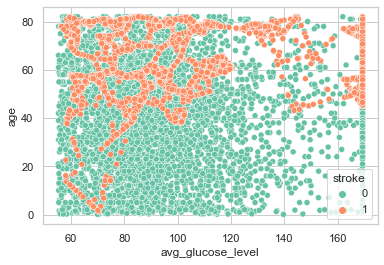

In [69]:
#scatterplot to check the stroke occurance after resampling the data 
sns.scatterplot(data = Sampled_data, x ='avg_glucose_level', y = 'age', hue = 'stroke')

<b> After Using SMOTE Technique you can see Data has been resampled and Stroke ->1 has been increased <b>

<b> 12. boxplot <b>

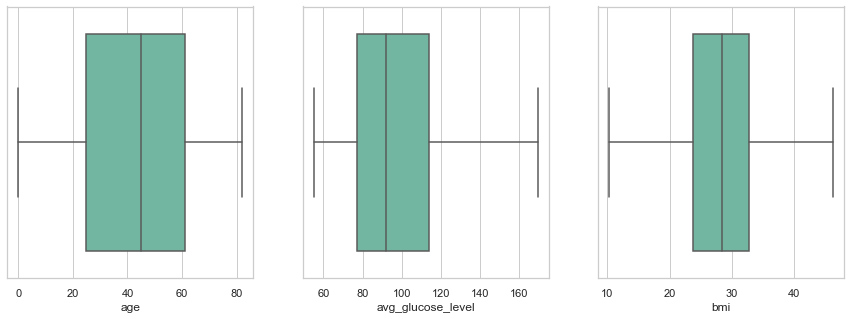

In [70]:
#we are plotting boxplot for age , avg_glucose_level and bmi and finding the outlier in these columns 
plt.figure(figsize =(15,5))
j=1
for i in ['age', 'avg_glucose_level', 'bmi']: 
    plt.subplot(1,3,j)
    sns.boxplot(data = df1 ,x=i)
    j=j+1

# <div align="center" Style="color:red"  color="Red"> Now Dataset is Ready and can apply machine Learning Models. </div>